# Face Recognizition End Term

# Problem Statement

*The objective of this project is to develop a facial recognition system using auto-encoders for a given dataset of class photos. The task involves implementing auto-encoders or denoising auto-encoders to extract features from the images and training a classifier neural network to recognize different faces in the dataset. The goal is to achieve maximum accuracy using the techniques taught in the course, without employing advanced techniques not covered in the curriculum.*

In [1]:
# Importing all the required libraries
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from keras.layers import Input, Dense
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# Setting the working directory
os.chdir("E:\studies\Ai and decision sciences - 1\photos-data_2\photos-data")

In [3]:
# Importing the image data 
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, folder_name in enumerate(os.listdir(folder)):
        path = os.path.join(folder, folder_name)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128)) # Resize the images
            img = img.astype(float)/255.0
            images.append(img)
            labels.append(label)
    return images, labels

data_dir = "E:\studies\Ai and decision sciences - 1\photos-data_2\photos-data"

# # Loading the images and labels
image_data, labels = load_images_from_folder(data_dir)

In [4]:
# Reshape the image data to 2D array
image_data_2d = np.reshape(image_data, (len(image_data), -1))

# Convert labels to a DataFrame
labels_df = pd.DataFrame(labels, columns=['Label'])

# Concatenate the labels DataFrame with the image data
data_df = pd.concat([pd.DataFrame(image_data_2d), labels_df], axis=1)

# Print the data DataFrame
print("Data shape:", data_df.shape)

Data shape: (699, 16385)


In [5]:
# Checking the unique lables
data_df.Label.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [6]:
X = data_df.iloc[:,:-1]
y = data_df.iloc[:,-1]

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building Auto Encoder Model

In [8]:
# Define the dimensions of the encoded and actual representations
encoding_dim = 128
input_dim = X_train.shape[1]
input_dim

16384

In [9]:
# Input layer
input_img = Input(shape=(input_dim,))

# Hidden layers in the encoder
layer_1 = Dense(64, activation='relu')(input_img)
layer_2 = Dense(32, activation='relu')(layer_1)

# Encoded representation
encoded = Dense(encoding_dim, activation='relu')(layer_2)

# Hidden layers in the decoder
layer_3 = Dense(32, activation='relu')(encoded)
layer_4 = Dense(64, activation='relu')(layer_3)


# Decoded representation
decoded = Dense(input_dim, activation='sigmoid')(layer_4)

In [10]:
# Autoencoder model
autoencoder = Model(input_img, decoded)

In [11]:
# Encoder model
encoder = Model(input_img, encoded)

In [12]:
autoencoder.compile(optimizer='adam', loss='mse')

In [13]:
# Train the autoencoder model
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

Epoch 1/50
18/18 [==============================] - 4s 86ms/step - loss: 0.0560 - val_loss: 0.0328
Epoch 2/50
18/18 [==============================] - 1s 56ms/step - loss: 0.0311 - val_loss: 0.0297
Epoch 3/50
18/18 [==============================] - 1s 56ms/step - loss: 0.0299 - val_loss: 0.0283
Epoch 4/50
18/18 [==============================] - 1s 57ms/step - loss: 0.0255 - val_loss: 0.0226
Epoch 5/50
18/18 [==============================] - 1s 58ms/step - loss: 0.0208 - val_loss: 0.0205
Epoch 6/50
18/18 [==============================] - 1s 55ms/step - loss: 0.0189 - val_loss: 0.0183
Epoch 7/50
18/18 [==============================] - 1s 57ms/step - loss: 0.0167 - val_loss: 0.0159
Epoch 8/50
18/18 [==============================] - 1s 54ms/step - loss: 0.0152 - val_loss: 0.0147
Epoch 9/50
18/18 [==============================] - 1s 55ms/step - loss: 0.0143 - val_loss: 0.0139
Epoch 10/50
18/18 [==============================] - 1s 56ms/step - loss: 0.0135 - val_loss: 0.0128
Epoch 11/

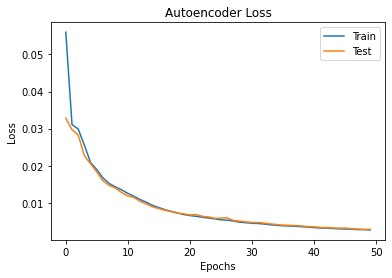

In [14]:
# Plot the loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

In [15]:
# Generate reconstructed images
encoded_imgs = encoder.predict(X_test)
reconstructed_imgs = autoencoder.predict(X_test)

# Evaluate the autoencoder model
mse = np.mean(np.power(X_test - reconstructed_imgs, 2))
print("Mean Squared Error:", mse)

5/5 [==============================] - 0s 10ms/step
Mean Squared Error: 0        0.000054
1        0.000080
2        0.000068
3        0.000067
4        0.000040
           ...   
16379    0.001300
16380    0.002218
16381    0.001363
16382    0.002023
16383    0.002002
Length: 16384, dtype: float64


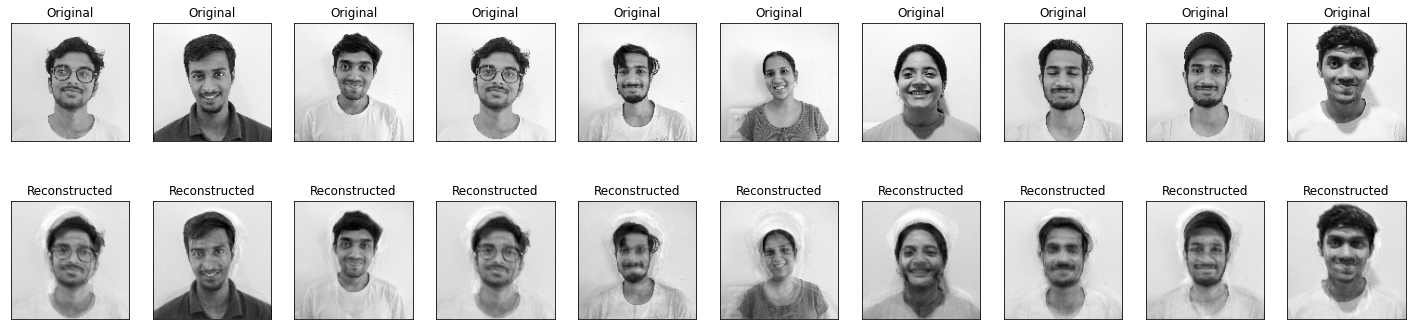

In [16]:
# Display some original and reconstructed images
n = 10 # Number of images to display
plt.figure(figsize=(25, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test.iloc[i].values.reshape(128, 128))
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(128, 128))
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Building the Classifier Model

In [17]:
num_classes = 12

In [18]:
# Creating a classification model using on the encoder
classification_input = Input(shape=(encoding_dim,))
classification_hidden = Dense(64, activation='relu')(classification_input)
classification_output = Dense(num_classes, activation='softmax')(classification_hidden)

classification_model = Model(classification_input, classification_output)

# Compiling the model
classification_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model using the encoded representations as inputs
classification_history = classification_model.fit(encoded_imgs, y_test,
                                                  epochs=50,
                                                  batch_size=32,
                                                  shuffle=True,
                                                  validation_split=0.2)

# Evaluating the model
classification_loss, classification_accuracy = classification_model.evaluate(encoded_imgs, y_test)

print("Classification Accuracy:", classification_accuracy)

Epoch 1/50
4/4 [==============================] - 2s 137ms/step - loss: 14.9332 - accuracy: 0.0536 - val_loss: 9.7323 - val_accuracy: 0.0357
Epoch 2/50
4/4 [==============================] - 0s 31ms/step - loss: 9.1799 - accuracy: 0.0804 - val_loss: 6.9325 - val_accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 30ms/step - loss: 6.0210 - accuracy: 0.1518 - val_loss: 5.9100 - val_accuracy: 0.0714
Epoch 4/50
4/4 [==============================] - 0s 34ms/step - loss: 4.7696 - accuracy: 0.1964 - val_loss: 4.6735 - val_accuracy: 0.2143
Epoch 5/50
4/4 [==============================] - 0s 28ms/step - loss: 3.4385 - accuracy: 0.3125 - val_loss: 3.6975 - val_accuracy: 0.2500
Epoch 6/50
4/4 [==============================] - 0s 24ms/step - loss: 2.6122 - accuracy: 0.4018 - val_loss: 3.1033 - val_accuracy: 0.3571
Epoch 7/50
4/4 [==============================] - 0s 29ms/step - loss: 1.9719 - accuracy: 0.4821 - val_loss: 2.4114 - val_accuracy: 0.5000
Epoch 8/50
4/4 [=====

Unique labels in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label names: {0: 'Abhay', 1: 'Atif', 2: 'Bhanu', 3: 'Dhwani', 4: 'Hashika', 5: 'Mustafa', 6: 'Prasad', 7: 'Rahul', 8: 'Salman', 9: 'Shivansh', 10: 'Swaijit', 11: 'Yugandhar'}


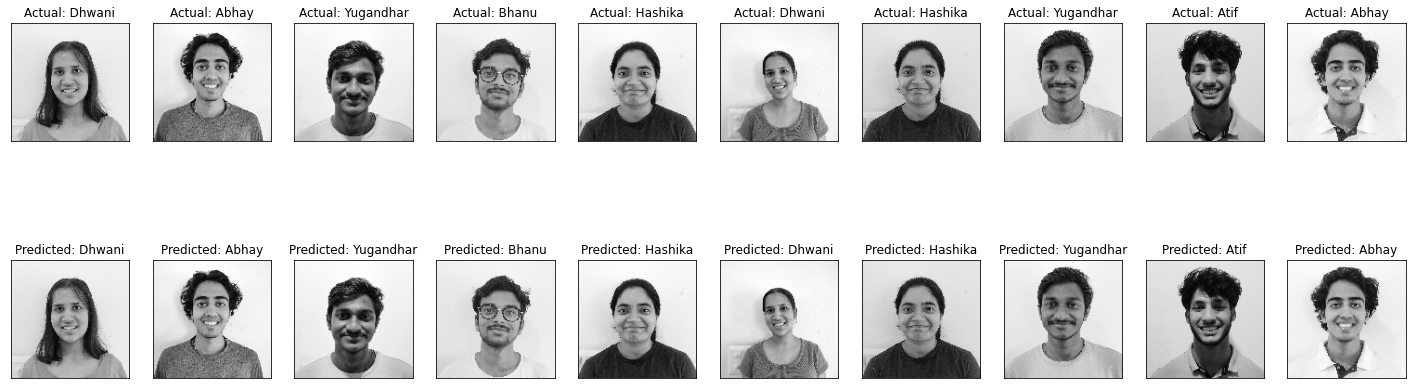

In [39]:
# Create a dictionary mapping label indices to label names
label_names = {
    0: "Abhay",
    1: "Atif",
    2: "Bhanu",
    3: "Dhwani",
    4: "Hashika",
    5: "Mustafa",
    6: "Prasad",
    7: "Rahul",
    8: "Salman",
    9: "Shivansh",
    10: "Swaijit",
    11: "Yugandhar"
}

print("Unique labels in y_test:", np.unique(y_test))
print("Label names:", label_names)

# Convert y_test to a NumPy array
y_test = y_test.values

# Generate random indices for the images
np.random.seed(42) 
indices = np.random.choice(len(X_test), size=n, replace=False)

# Display random actual and predicted images with label names
plt.figure(figsize=(25, 8))
for i, index in enumerate(indices):
    # Display actual images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test.iloc[index].values.reshape(128, 128))
    
    if y_test[index] in label_names:
        true_label = label_names[y_test[index]]
    else:
        true_label = "Unknown"
        
    plt.title("Actual: {}".format(true_label))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display predicted images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test.iloc[index].values.reshape(128, 128))
    
    if predicted_labels[index] in label_names:
        predicted_label = label_names[predicted_labels[index]]
    else:
        predicted_label = "Unknown"
    
    plt.title("Predicted: {}".format(predicted_label))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
